In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

### 3.2.1 生成数据集

In [2]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

In [3]:
f'features: {features[0]}', f'label: {labels[0]}', features.shape, labels.shape

('features: tensor([-0.5923,  1.5986])',
 'label: tensor([-2.4466])',
 torch.Size([1000, 2]),
 torch.Size([1000, 1]))

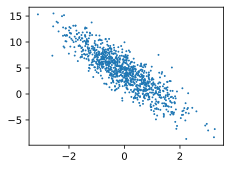

In [4]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)

### 3.2.2 读取数据集

In [12]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))

    # 这些样本是随机读取的, 没有特定的顺序
    random.shuffle(indices)

    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [6]:
batch_size = 10
for X, y in data_iter(10, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.2736,  0.7814],
        [ 0.8721, -0.7650],
        [ 1.3029,  0.7924],
        [ 3.3551,  1.7085],
        [-0.0630, -1.0101],
        [ 1.8508,  0.6001],
        [-0.2440, -1.0152],
        [ 1.1813, -1.0671],
        [ 0.1055,  1.1344],
        [-0.2641,  0.2645]]) 
 tensor([9.3592])


### 3.2.3 初始化模型参数

In [7]:
w = torch.normal(0, 0.01, size=[2, 1], requires_grad=True)
b = torch.zeros([1], requires_grad=True)

In [8]:
w.detach().numpy(), b

(array([[0.01045742],
        [0.00063296]], dtype=float32),
 tensor([0.], requires_grad=True))

### 3.2.7 训练

In [9]:
lr = 0.03
num_epochs = 3
net = d2l.linreg
loss = d2l.squared_loss
sgd = d2l.sgd

In [14]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失

        # 因为l形状是(batch_size,1), 而不是一个标量. l中的所有元素被加到一起, 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数

    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.000111
epoch 2, loss 0.000048
epoch 3, loss 0.000048


In [15]:
w, b

(tensor([[ 2.0000],
         [-3.4001]], requires_grad=True),
 tensor([4.2000], requires_grad=True))

In [16]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([3.6955e-06, 1.3995e-04], grad_fn=<SubBackward0>)
b的估计误差: tensor([-3.7670e-05], grad_fn=<RsubBackward1>)
